In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Trainingsdaten_long.csv')
df['Datum'] = pd.to_datetime(df['Datum'])
df


,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Samstag,Sonntag,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,0,0,98.9,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,0,1,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,1,1,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,1,0,101.2,0.0,0,0,0,1,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,1,0,0


In [6]:
# Create a copy of the dataframe
df_scaled = df.copy()   

# Standardize only VPI
vpi_scaler = StandardScaler()
df_scaled['VPI'] = vpi_scaler.fit_transform(df[['VPI']])
df_scaled

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Samstag,Sonntag,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,0,0,-1.220832,0.0,0,0,0,1,0,0
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,0,0,-1.220832,0.0,0,0,0,1,0,0
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,0,0,-1.220832,0.0,0,0,0,1,0,0
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,0,0,-1.220832,0.0,0,0,0,1,0,0
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,0,0,-1.220832,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0,0,1.178112,0.0,0,0,0,0,1,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0,0,1.178112,0.0,0,0,0,1,1,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,1,0,1.178112,0.0,0,0,0,1,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0,0,1.178112,0.0,0,0,0,1,0,0


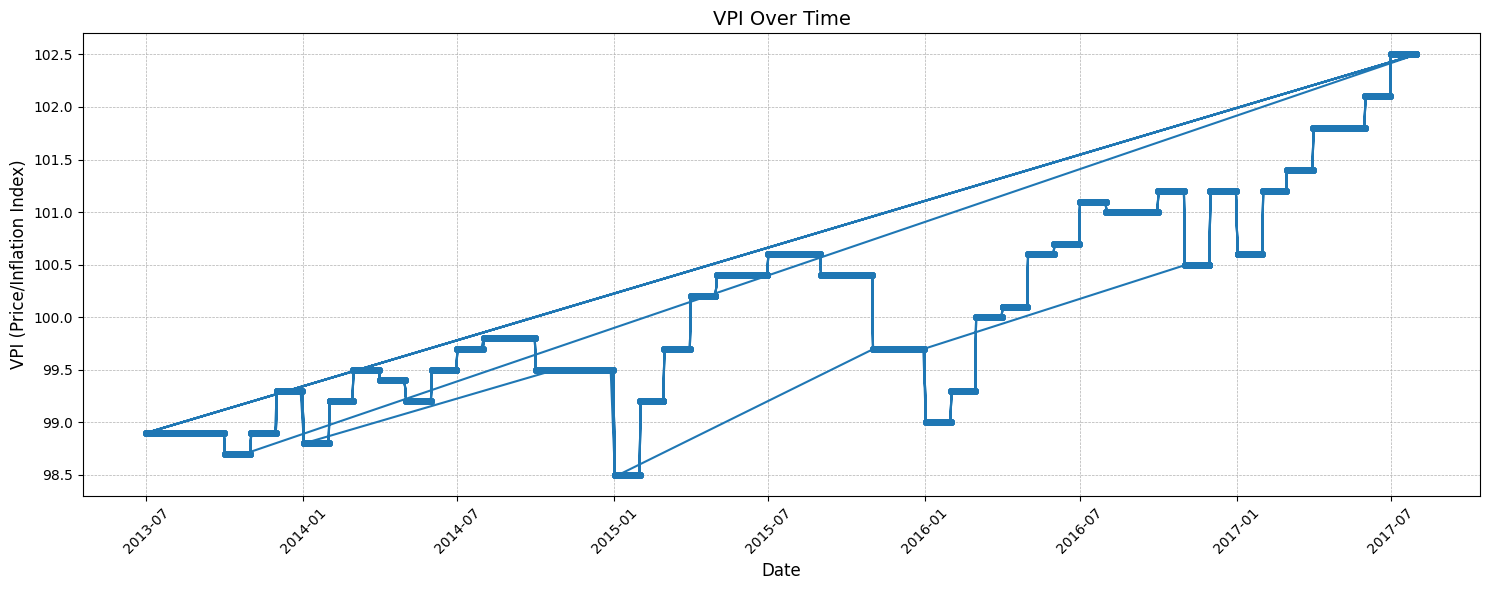

VPI Statistics:
                  mean    min    max
Datum                               
2013-12-31   98.933578   98.7   99.3
2014-12-31   99.453454   98.8   99.8
2015-12-31   99.977922   98.5  100.6
2016-12-31  100.484737   99.0  101.2
2017-12-31  101.630769  100.6  102.5


/tmp/ipykernel_7011/1780787602.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  print(df.groupby(pd.Grouper(key='Datum', freq='Y'))['VPI'].agg(['mean', 'min', 'max']))


In [9]:
# Create the plot
plt.figure(figsize=(15, 6))

# Line plot of VPI over time
plt.plot(df['Datum'], df['VPI'], marker='o', linestyle='-', markersize=4)

plt.title('VPI Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('VPI (Price/Inflation Index)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Optional: Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# Print some additional time series statistics
print("VPI Statistics:")
print(df.groupby(pd.Grouper(key='Datum', freq='Y'))['VPI'].agg(['mean', 'min', 'max']))